# Neutron Activation and Gas-Filled Detectors
*In order to save changes that you make, remember to save the document before closing it!*

**In the code cells, whenever you see the comment " -> TODO <- " This means that
you need to edit or add something to that row in the code. Read the relevant
comment which follows.**


In [17]:
#This code cell holds useful code which is used for the analysis. Execute it like normal.

import numpy as np #routines to for data handling and mathematics
from scipy.optimize import curve_fit #rutine to fit the data with
import math
import matplotlib.pyplot as plt #routines for making plots
import sys
import csv
import matplotlib
matplotlib.use('Agg') # enable interactive notebook plots (alternative: use 'inline' instead of 'notebook'/'widget' for static images)
%matplotlib notebook

sys.path.append('./lib')
import fittingFunctions, MCA
#%pip install uncertainties
from uncertainties import ufloat
from uncertainties.umath import *  

## Task 1: Determining the supply voltage ($V_{o}$) of a the GM-tube (with $\gamma$-rays)

### Step 5: Put in your measured values (counts and voltage) in the code cell below and execute it to produce a plot of your plateau curve.

<IPython.core.display.Javascript object>


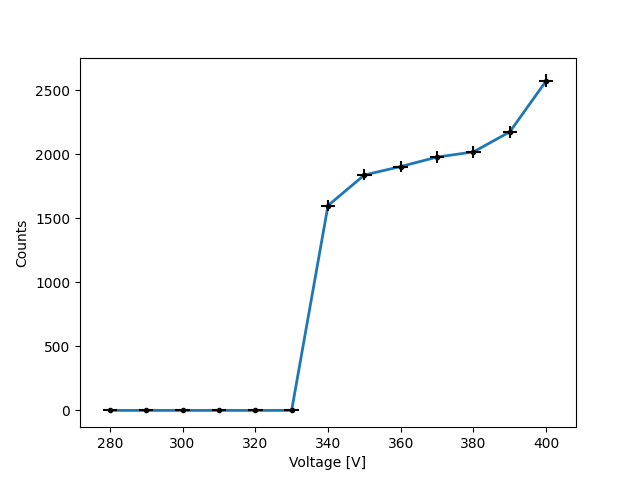

[0.0+/-0 0.0+/-0 0.0+/-0 0.0+/-0 0.0+/-0 0.0+/-0 1600.0+/-40.0
 1839.0+/-42.883563284783136 1905.0+/-43.64630568559039
 1979.0+/-44.48595283907045 2019.0+/-44.93328387732194
 2176.0+/-46.647615158762406 2574.0+/-50.73460357586329]


In [2]:
voltage = [280, 290,300,310,320,330,340,350,360,370,380,390,400] #-> TODO <- insert your voltage values in the brackets, separate each entry with a comma (,)
counts = [0,0,0,0,0,0,1600,1839,1905,1979,2019,2176,2574]  #-> TODO <- insert your counts for the relevant voltage in the brackets, separate each entry with a comma (,)
             # separate each entry with a comma (,)
#Array of values and errors
voltagearr = np.array([ufloat(x, 2) for x in voltage])
countsarr = np.array([ufloat(x, np.sqrt(x)) for x in counts])
#List of values
voltage = [x.nominal_value for x in voltagearr]
counts = [x.nominal_value for x in countsarr]
#List of errors
countserr = [x.std_dev for x in countsarr]
voltageerr = [x.std_dev for x in voltagearr]
##### NO NEED TO EDIT ####
plt.figure()
plt.plot(voltage, counts, lw=2)
plt.xlabel('Voltage [V]')
plt.ylabel('Counts');
plt.errorbar(voltage, counts, yerr=countserr, xerr=voltageerr, fmt='.k');
##########################
print(countsarr)

### Step 7: Use the following equation to derive the operating voltage $V_{o}$: 

$$V_{o} = V_{a} +\frac{V_{b}-V_{a}}{3},$$

where $V_{a}$ and $V_{a}$ are the location at the start and end of the plateau curve, respectively.

<IPython.core.display.Javascript object>


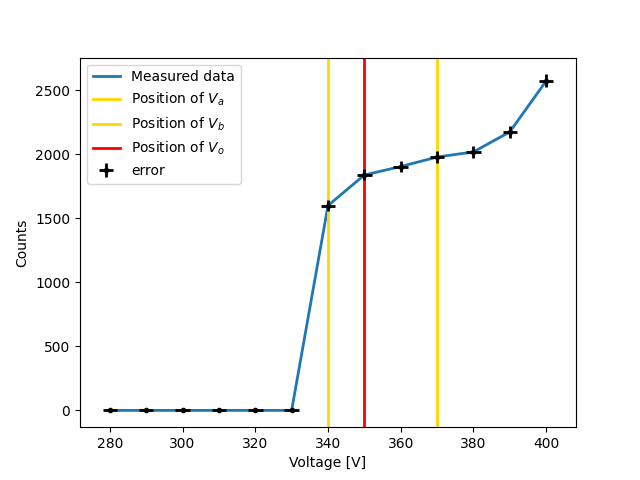

V_o = 350.0+/-1.5 Volts


In [3]:
V_a = voltagearr[6]#340#-> TODO <- Insert the voltage [V] at which your plateau STARTS, after the equal sign.
V_b = voltagearr[9]#-> TODO <- Insert the voltage [V] at which your plateau ENDS, after the equal sign.
#Execute and read of the answer below together with a new plot.
##### NO NEED TO EDIT ####

V_o =  V_a+(V_b-V_a)/3
plt.figure()
plt.plot(voltage, counts, lw=2, label='Measured data')

plt.axvline(x = V_a.n, lw=2, color="gold", label="Position of $V_{a}$")
plt.axvline(x = V_b.n, lw=2, color="gold", label="Position of $V_{b}$")
plt.axvline(x = V_o.n, lw=2, color="red", label="Position of $V_{o}$")
plt.errorbar(voltage, counts, yerr=countserr, xerr=voltageerr,  fmt='.k' ,lw=2, label='error');
plt.legend()
plt.xlabel("Voltage [V]")
plt.ylabel("Counts")
print(f"V_o = {'{0:.1f}'.format(V_o)} Volts")
##########################

### Task 1 Questions:
(double click to edit, shift+ENTER to execute changes)

**Question 1**: Explain the shape of the characteristic curve seen above. The measurements yielding zero in the beginning, the plateau and rise at the end.

**->**

**Question 2**: Why is the supply voltage determined as 1/3 the distance into the plateau rather than, for instance, 1/2?

**->**

## Task 2: Determining the *total* dead-time of a GM-tube (with $\gamma$ rays)}

### Step 6: Input your count values $n_1$, $n_2$, $n_{12}$ and $n_b$ in the Jupyter Notebook and calculate the *total* dead-time ($\tau$) of the GM-tube.

Where 
- $n_1$ is the number of counts with the *first* source,
- $n_{12}$ is the number of counts with *both* sources,
- $n_{2}$ is the number of counts with the *second* source, and
- $n_{b}$ is the number of counts with *no* sources (background)

If we denote the corresponding true rates (no dead-time) with $N$, then 
$$N_{12} - N_{b} = (N_{1} - N_{b}) + (N_{2} - N_{b})$$
$$N_{12} + N_{b} = N_{1} + N_{2}$$

If we assume that the events occuring during the dead-time of the detector doesn't extend the dead-time, then the fraction of time that the detector is dead during a measurement of $N$ is just the product $n\tau$. This gives us the rate of losses as $N n \tau$, which we can also write as $N - n$. Solving for $N$, we have 
$$N = \frac{n}{1-n\tau}$$ 

If we insert this into our equation above, we can solve for the dead-time $\tau$ as 
$$\tau = \frac{X(1-\sqrt{1-Z})}{Y}$$ 
where
$$X = n_1 n_2 - n_b n_{12},$$
$$Y = n_1 n_2 (n_{12} + n_b) - n_b n_{12}(n_1 + n_2)$$
$$Z  = \frac{Y \cdot (n_1 + n_2 - n_b - n_{12})}{X^2}$$

In [4]:
n1  = ufloat(56722,np.sqrt(56722))/300 #-> TODO <- Insert the number of counts with source 1 [1/s], after the equal sign.
n12 = ufloat(89139,np.sqrt(89139))/300#-> TODO <- Insert the number of counts with source 1 and 2 together [1/s], after the equal sign.
n2  = ufloat(34292,np.sqrt(34292))/300#-> TODO <- Insert the number of counts with source 2 [1/s], after the equal sign.
nb  = ufloat(330,np.sqrt(330))/300#-> TODO <- Insert the number of counts for the background measurement [1/s], after the equal sign.
print(f"{'{0:.f}'.format(n1)}")
print(f"{'{0:.f}'.format(n12)}")
print(f"{'{0:.f}'.format(n2)}")
print(f"{'{0:.f}'.format(nb)}")

##### NO NEED TO EDIT ####
X = n1*n2 - nb*n12
Y = n1*n2*(n12 + nb) - nb*n12*(n1 + n2)
Z = Y*(n1 + n2 - nb - n12)/(X*X)
total_dead = X*(1 - (1 - Z)**0.5)/Y
print(f"tau = {'{0:.2f}'.format(total_dead*1000000)} us")
##########################
print(f"X = {'{0:.2f}'.format(X)}")
print(f"Y = {'{0:.2f}'.format(Y)}")
print(f"Z = {'{0:.2f}'.format(Z)}")

189.1+/-0.8
297.1+/-1.0
114.3+/-0.6
1.10+/-0.06
tau = 123.24+/-33.92 us
X = 21285.50+/-148.93
Y = 6346291.27+/-48801.35
Z = 0.07+/-0.02


### Task 2 Questions:
(double click to edit, shift+ENTER to execute changes)

**Question 1**: Compare your result with the typical *dead-time* range for a GM tube. Can you explain why yours is different?

**->**


## Task 3: Determining the efficiency of a GM-tube (with $\gamma$-rays)

### Step 6: Now, calculate the efficiency ($e$) using the following equation:
$$e = \frac{4\pi}{I \omega}\left( \frac{n}{1-n\tau} - \frac{n_b}{1-n_b\tau} \right),$$
$$\omega = \frac{\pi\left(\frac{d}{2}\right)^{2}}{R^2}$$
where 
- $I$ is the total activity (intensity) of the source (given by the supervisor), 
- $\tau$ is the total dead-time calculated in the previous task (**in seconds**), 
- $n$ is the measured activity with the source, 
- $n_b$ is the measured activity without the source (the background), 
- $d$ is the measured *diameter* of the aperture (mm), and 
- $R$ is the measured distance from the source to the detector (mm).

Note that to write a real number in python you can use scientific notation. The
following are equivalent ways of writing the number $1.69 \cdot 10^{-7}$

``` python 
number  = 1.69 * 10 ** (-7)
number  = 1.69e-7 # Note: No parenthesis 
```

In [5]:
total_dead_time = total_dead*1e-6#-> TODO <- Insert the total dead-time [s] (calculated in the precious task), after the equal sign.
I =  1.334e6#-> TODO <- Insert the total activity (insensity) of the source [1/s], after the equal sign. 
n =  ufloat(1353,np.sqrt(1353))/600#-> TODO <- Insert the measured activity with the source [1/s], after the equal sign.
nb = ufloat(825,np.sqrt(825))/600#-> TODO <- Insert the measured acitvity without the source [1/s], (background) after the equal sign.
d =  ufloat(10,0.1)#-> TODO <- Insert the sizes of the aperture in the lead shielding [mm], after the equal sign.
R =  ufloat(160-7,0.1)#-> TODO <- Insert the distance between the source and detector [mm], after the equal sign.
##### NO NEED TO EDIT ####
omega = (np.pi*(d/2)**2)/R**2
eff = ((4*np.pi)/(I*omega)) * (n/(1 - n*total_dead_time) - nb/(1 - nb*total_dead_time))
print(f"n = {'{0:.f}'.format(n)}")
print(f"nb = {'{0:.f}'.format(nb)}")
print(f"e = {'{0:.3f}'.format(eff * 100)} %")
##########################

n = 2.25+/-0.06
nb = 1.38+/-0.05
e = 0.247+/-0.022 %


### Task 3 Questions:
(double click to edit, shift+ENTER to execute changes)

**Question 1**: The *expected* efficiency of a GM-tube for γ-rays is relatively low.
List a few reasons why. How does the efficiency influence the function of the
tube for practical purposes?

**->**


## Task 4: Measure activated $^{108}$Ag and $^{110}$Ag radioactive decay and determine neutron absorption cross-section for $^{107}$Ag and $^{109}$Ag

In the same folder as your Jupyter Notebook you are given the file
`Silver_activ_sep1.Asc`. The file contains measurements of activated $^{108}$Ag
and $^{110}$Ag radioactive decay after an activation time of $T_S = 18$ min$,
23$ s. You can use this file to try the exercise while you are waiting for your
measurement to complete. Once the measurement is finished, add the file you produced into the same folder
as the notebook, change the name of the file in the cell below to that of
your own file, update $T_S$ to the activation time of your silver plates, and run 
the exercise with your own measurements

Note that the filename should include the file extension (likely ".Asc"), even
if your operating system doesn't show it by default. 

In [14]:
filename = "Silver_activ_sep1.Asc" #-> TODO <- Fill in the name of your file once you have your measurements
T_S = 18*60+23 #-> TODO <- Put in the activation time [s] of the silver plate, after the equal sign.

### Step 5: Execute the cell to import your data to produce a plot.

[3524.0, 3081.0, 2314.0, 1681.0, 1262.0, 980.0, 861.0, 679.0, 562.0, 527.0, 557.0, 502.0, 454.0, 370.0, 378.0, 384.0, 335.0, 307.0, 308.0, 305.0, 286.0, 248.0, 269.0, 280.0, 216.0, 252.0, 172.0, 185.0, 185.0, 155.0, 162.0, 175.0, 132.0, 186.0, 131.0, 112.0, 165.0, 153.0, 126.0, 124.0, 137.0, 115.0, 108.0, 71.0, 103.0, 96.0, 80.0, 119.0, 85.0, 85.0, 52.0, 82.0, 69.0, 88.0, 62.0, 62.0, 56.0, 69.0, 72.0, 68.0, 41.0, 59.0, 48.0, 30.0, 43.0, 100.0, 74.0, 51.0, 43.0, 47.0, 51.0, 32.0, 54.0, 27.0, 47.0, 34.0, 29.0, 23.0, 43.0, 28.0, 27.0, 19.0, 26.0, 29.0, 36.0, 35.0, 20.0, 37.0, 29.0, 28.0, 15.0, 35.0, 12.0, 42.0, 34.0, 21.0, 17.0, 24.0, 44.0, 29.0, 15.0, 17.0, 6.0, 23.0, 27.0, 35.0, 22.0, 21.0, 16.0, 32.0, 31.0, 17.0, 27.0, 33.0, 33.0, 17.0, 13.0, 20.0, 18.0, 39.0, 11.0, 30.0, 12.0, 12.0, 20.0, 43.0, 35.0, 54.0, 27.0, 39.0, 36.0, 28.0, 21.0, 23.0, 24.0, 15.0, 25.0, 21.0, 22.0, 18.0, 7.0, 26.0, 24.0, 17.0, 15.0, 25.0, 18.0, 19.0, 22.0, 18.0, 20.0, 24.0, 17.0, 22.0, 26.0, 26.0, 25.0, 29.0, 12

<IPython.core.display.Javascript object>


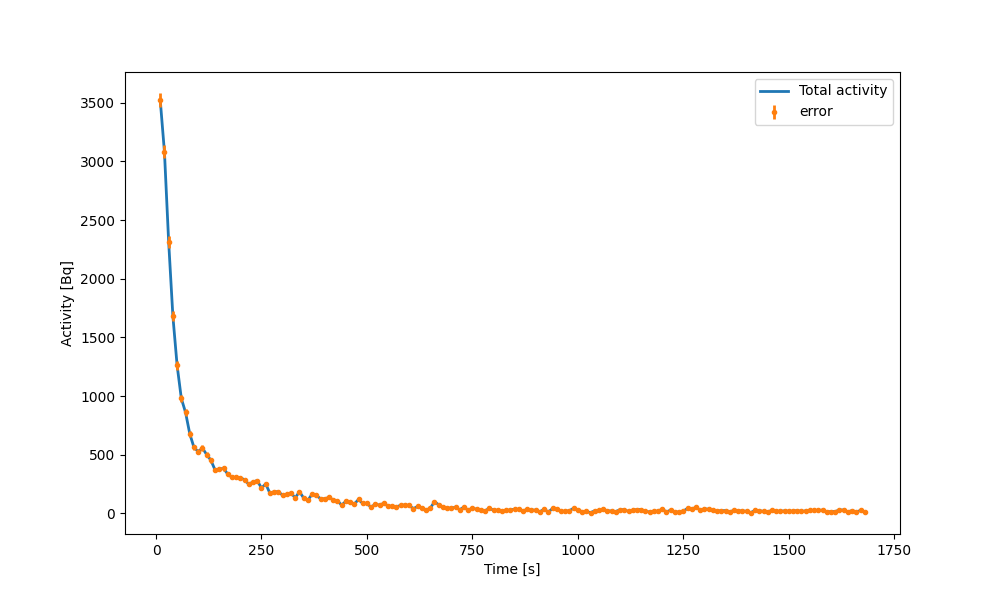

In [47]:
# Execute this cell to import and plot your data 
#### NO NEED TO EDIT ####
#Import your data for the Silver measurement
data = MCA.load_MCS_spectrum(filename) # the name of your file to load data
data = [ufloat(x, np.sqrt(x)) for x in data]
Ag_counts = [x.nominal_value for x in data]
Ag_err = [x.std_dev for x in data]
print(Ag_counts)
Ag_bins = np.arange(10, (28*60+10), 10) #End time is 28 min.
plt.figure(figsize=(10, 6))
plt.plot(Ag_bins, Ag_counts, lw=2, label='Total activity')
plt.errorbar(Ag_bins, Ag_counts, yerr=Ag_err,  fmt='.' ,lw=2, label='error');
#plt.title('Silver decay spectrum')
plt.xlabel('Time [s]')
plt.ylabel('Activity [Bq]');
plt.legend()
#########################

### Step 6: Perform the double exponential fit of your data. 
Remember: the function we fit to the data looks like this:
$$a \cdot e^{-b \cdot t}+ c \cdot e^{-d \cdot t}+ f$$
The following plot with be logarithmic to make it easier to read.

<IPython.core.display.Javascript object>


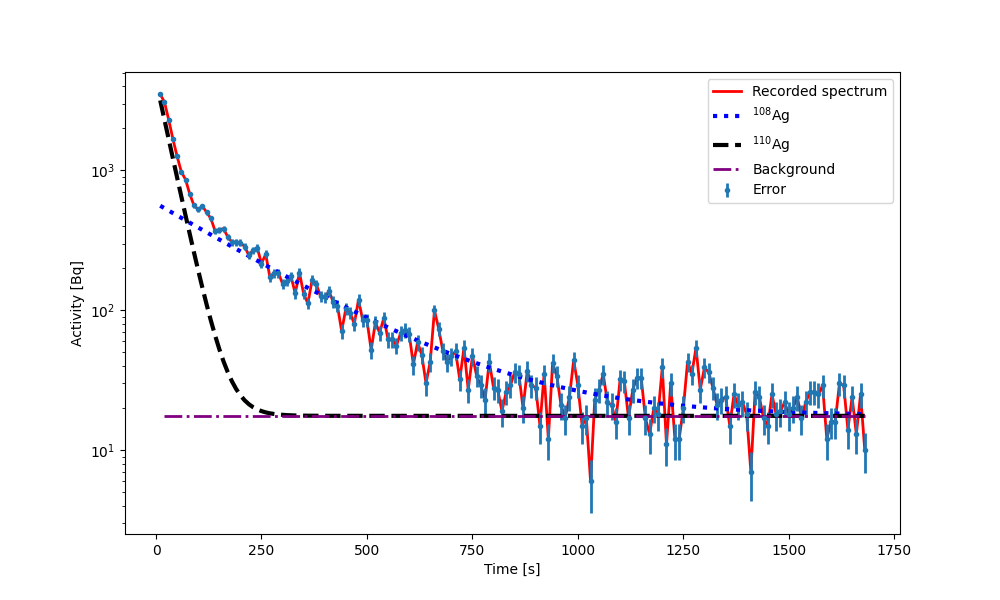

Estimated values for fitted parameters to double exponential a⋅e^{-b⋅t} + c⋅e^{-d⋅t} + f:
a = 564.699
b = 0.0041
c = 4345.815
d = 0.0321
f = 17.586


In [49]:
#-> TODO <- Execute this cell to perform the fit. After, read off your values for the fit below the cell.

##### NO NEED TO EDIT ####
# These are initial guesses for the values of the five parameters that we are estimating
a_guess = 2000 
b_guess = 0.004 
c_guess = 2000  
d_guess = 0.03 
f_guess = 10 
popt, pcov = curve_fit(fittingFunctions.Exp2Func, Ag_bins, Ag_counts, p0=[a_guess, b_guess, c_guess, d_guess, f_guess])
plt.figure(figsize=(10, 6))
plt.plot(Ag_bins, Ag_counts, lw=2, color='red', label='Recorded spectrum')
plt.errorbar(Ag_bins, Ag_counts, yerr=Ag_err,  fmt='.' ,lw=2, label='Error');
plt.plot(Ag_bins, fittingFunctions.ExpFunc(Ag_bins, popt[0], popt[1], popt[4]), lw=3, linestyle=':', color='blue', label='$^{108}$Ag')
plt.plot(Ag_bins, fittingFunctions.ExpFunc(Ag_bins, popt[2], popt[3], popt[4]), lw=3, linestyle='--', color='black', label='$^{110}$Ag')
plt.hlines(popt[4], Ag_bins[1], Ag_bins[-1], lw=2, linestyles="-.", color='purple', label='Background')
plt.legend()
# If you want to limit the lower part of the plot that is visible, you can use something like 
# plt.ylim(bottom=5)
plt.yscale('log')
#plt.title('Silver decay spectrum and fits')
plt.xlabel('Time [s]')
plt.ylabel('Activity [Bq]')
a = round(popt[0],3)
b = round(popt[1],4)
c = round(popt[2],3)
d = round(popt[3],4)
print("Estimated values for fitted parameters to double exponential a⋅e^{-b⋅t} + c⋅e^{-d⋅t} + f:")
print("a = {}".format(round(popt[0],3)))
print("b = {}".format(round(popt[1],4)))
print("c = {}".format(round(popt[2],3)))
print("d = {}".format(round(popt[3],4)))
print("f = {}".format(round(popt[4],3)))

#########################

### Step 1:  Put in the maximum activities measured for $A_{108}$ and $A_{110}$, the two decay-constants $\lambda_{108}$ and $\lambda_{110}$ and the relative abundance $k_{107}$ and $k_{109}$ of each isotope. 

The maximum activites $A_{108}, A_{110}$ (starting activites) and the decay
constants $\lambda_{108}, \lambda_{110}$ can be found from the output of the fit
in the previous task. 

Remember, the equation looked like this: $$\frac{\sigma_{109}}{\sigma_{107}} =
\frac{k_{107} \cdot \left(1-e^{-\lambda_{108}\cdot t} \right) \cdot
A_{110}}{k_{109}\cdot \left(1-e^{-\lambda_{110}\cdot t} \right) \cdot A_{108}}$$

where we use the activation time $T_S$ that you measured as $t$ and $k_{107} \approx 51.35\,\%, k_{109} \approx {48.65}\,\%$ are the relative abundances of each silver isotope. 

In [50]:
A_108 =  a    #-> TODO <- Put in the measured maximum activity [1/s] of Ag-108, after the equal sign.
A_110 =   c   #-> TODO <- Put in the measured maximum activity [1/s] of Ag-110 , after the equal sign.
lambda_108 = b #-> TODO <- Put in the decay-constant [1/s] for Ag-108 , after the equal sign.
lambda_110 = d #-> TODO <- Put in the decay-constant [1/s] for Ag-118 , after the equal sign.
k_107 =  51.35    #-> TODO <- Put in the relative abundance [%] for Ag-107, after the equal sign.
k_109 =  48.65    #-> TODO <- Put in the relative abundance [%] for Ag-109, after the equal sign.



#### DO NOT EDIT ####
rel_cross = (k_107 * (1 - np.exp(-lambda_108 * T_S)) * A_110)  /  (k_109*(1 - np.exp(-lambda_110*T_S))*A_108)
print("Relative cross section = {}".format(round(rel_cross, 2)))
#####################

Relative cross section = 8.03


### Task 4 Questions:
(double click to edit, shift+ENTER to execute changes)

**Question 1**: According to the fit, what are the two decay constants for $^{108}$Ag and $^{110}$Ag, respectively and what is the background activity? 

**->**
- $\lambda_{108} = $  
- $\lambda_{110} = $
- Background activity $=$ 

**Question 2**: Compare your results for the two decay-constants with tabulated values. What do you think?

**->**
**Question 3**: What do you get for the relative cross-section?

**->**

**Question 4**: Compare  your  result  with  the  tabulated  values  for  thermal neutrons ($E_n \approx 0.025$ eV):

Why is your answer different?

**->**